### Group Assignment 1
#### Topic : Buckley Leverett Simulator
###### 1. Achmad Iyan Alfadany (101320032)
###### 2. Arrafi'atu Arsy Almas (101320068)
###### 3. M. Fahmi Munawar (10132050)
###### 4. Hygiano Paksi W.A (101320090)
###### 5. Kemal Reviansyah Hermawanto (101320118)


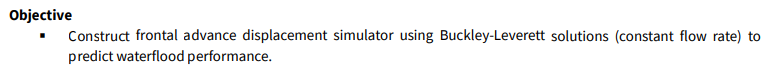

Youtube Link :
https://www.youtube.com/watch?v=3hP9Tdal6ho

#### Buckley Leverret Simulator

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import LineString

#### User Input

In [2]:
#Create User Input
Swi = float(input("Masukkan Nilai Swi : "))
Sor = float(input("Masukkan Nilai Sor : "))
Fvf = float(input("Masukkan Nilai Fvf : "))

#Reservoir Properties
Porosity = float(input("Masukan Nilai Porositas : "))
width = float(input("Masukan Lebar Reservoir : "))
length = float(input("Masukan Panjang Reservoir : "))
thickness = float(input("Masukan Tebal Reservoir : "))

#Fluid Properties
uo = float(input("Masukan Nilai Viskositas Minyak : "))
uw = float(input("Masukan Nilai Viskositas Air : "))

#Injection Rate
Q_rate = float(input("Masukan Nilai Laju Injeksi : "))

In [3]:
#Create User Input

# Swi = 0.371
# Sor = 0.298
# Fvf = 1

# #Reservoir Properties
# Porosity = 0.11
# width = 312
# length = 924
# thickness = 23

# #Fluid Properties
# uo = int(11.4)
# uw = int(1.1)

# #Injection Rate
# Q_rate = 608

#### Perhitungan (Swd, Sw, Kro, Krw, dan Fw)

In [4]:
swd = np.arange(0,1.05,0.05)
swd

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [5]:
sw = swd*(1-Sor-Swi)+Swi

In [6]:
kro = (1-swd)**3
krw = swd**3

In [7]:
kro

array([1.00000e+00, 8.57375e-01, 7.29000e-01, 6.14125e-01, 5.12000e-01,
       4.21875e-01, 3.43000e-01, 2.74625e-01, 2.16000e-01, 1.66375e-01,
       1.25000e-01, 9.11250e-02, 6.40000e-02, 4.28750e-02, 2.70000e-02,
       1.56250e-02, 8.00000e-03, 3.37500e-03, 1.00000e-03, 1.25000e-04,
       0.00000e+00])

In [8]:
krw

array([0.00000e+00, 1.25000e-04, 1.00000e-03, 3.37500e-03, 8.00000e-03,
       1.56250e-02, 2.70000e-02, 4.28750e-02, 6.40000e-02, 9.11250e-02,
       1.25000e-01, 1.66375e-01, 2.16000e-01, 2.74625e-01, 3.43000e-01,
       4.21875e-01, 5.12000e-01, 6.14125e-01, 7.29000e-01, 8.57375e-01,
       1.00000e+00])

In [9]:
fw = 1/(1+(uw*kro)/(uo*krw))

C:\Users\kemalrevian\AppData\Local\Temp\ipykernel_16716\3728974307.py:1: RuntimeWarning: divide by zero encountered in divide
  fw = 1/(1+(uw*kro)/(uo*krw))


In [10]:
fw

array([0.        , 0.00150867, 0.01401697, 0.05388561, 0.1393643 ,
       0.27737226, 0.44927748, 0.61802779, 0.75434243, 0.85021535,
       0.912     , 0.94980376, 0.97220467, 0.98515917, 0.99246174,
       0.99643898, 0.99849459, 0.99947   , 0.99986766, 0.99998593,
       1.        ])

In [11]:
#Determine Vpore
A = length*width*Porosity
Vpore = A*thickness
VporeN = Vpore*0.17811
print(Vpore,"cu-ft")
print(VporeN,"bbl")

729368.64 cu-ft
129907.8484704 bbl


#### DataFrame

In [12]:
df = pd.DataFrame({"Swd":swd,"Sw":sw,"Kro":kro,"Krw":krw  ,"Fw":fw})
df

,Swd,Sw,Kro,Krw,Fw
0,0.00,0.37100,1.000000,0.000000,0.000000
1,0.05,0.38755,0.857375,0.000125,0.001509
2,0.10,0.40410,0.729000,0.001000,0.014017
3,0.15,0.42065,0.614125,0.003375,0.053886
4,0.20,0.43720,0.512000,0.008000,0.139364
5,0.25,0.45375,0.421875,0.015625,0.277372
6,0.30,0.47030,0.343000,0.027000,0.449277
7,0.35,0.48685,0.274625,0.042875,0.618028
8,0.40,0.50340,0.216000,0.064000,0.754342
9,0.45,0.51995,0.166375,0.091125,0.850215


#### Fractional Flow Curve

Text(0.5, 1.0, 'Fractional Flow')

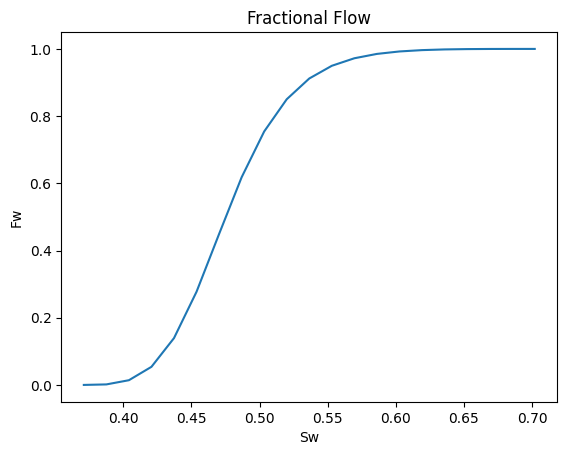

In [13]:
Fw_Curve = plt.plot(sw,fw)
plt.xlabel("Sw")
plt.ylabel("Fw")
plt.title("Fractional Flow")


#### Breakthrough Time Curve

Text(0.5, 1.0, 'Fractional Flow (Breakthrough Time)')

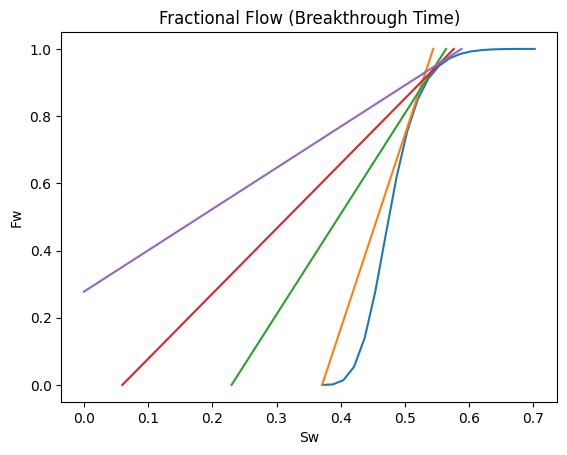

In [14]:
#Determine Breakthrough Time
xa = sw[0]
xb = 0.544              # atur nilai sampai menyinggung kurva 
ya = fw[0]
yb = fw[20]
plt.plot(sw,fw)
curve_bt, = plt.plot([xa,xb],[ya,yb])

#after bt1
xbt1a = 0.23            # atur nilai sampai menyinggung kurva 
xbt1b = 0.564           # atur nilai sampai menyinggung kurva 
ybt1a = fw[0]
ybt1b = fw[20]
curve_bt1, = plt.plot([xbt1a,xbt1b],[ybt1a,ybt1b])

#after bt2
xbt2a = 0.06            # atur nilai sampai menyinggung kurva 
xbt2b = 0.576           # atur nilai sampai menyinggung kurva 
ybt2a = fw[0]
ybt2b = fw[20]
curve_bt2, = plt.plot([xbt2a,xbt2b],[ybt2a,ybt2b])

#after bt3
xbt3a = 0               # atur nilai sampai menyinggung kurva 
xbt3b = 0.588           # atur nilai sampai menyinggung kurva 
ybt3a = fw[5]
ybt3b = fw[20]
curve_bt3, = plt.plot([xbt3a,xbt3b],[ybt3a,ybt3b])

plt.xlabel("Sw")
plt.ylabel("Fw")
plt.title("Fractional Flow (Breakthrough Time)")


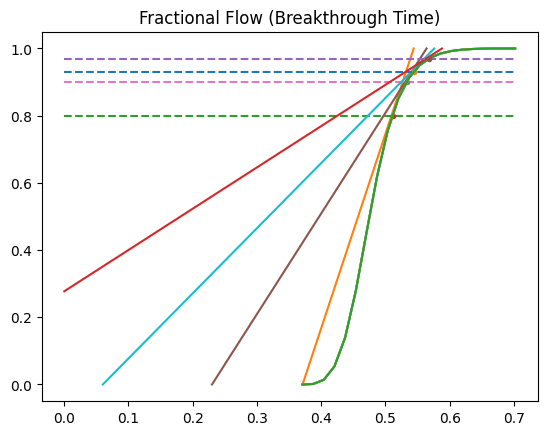

In [15]:

p = [xa,xb]
o = [ya,yb]

plt.plot(sw,fw)
plt.plot(p,o)
plt.plot([0,0.7],[0.8,0.8],'--')      #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_1 = LineString(np.column_stack(([0,0.7],[0.8,0.8])))  #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_2 = LineString(np.column_stack((sw,fw)))
intersection = line_1.intersection(line_2)

plt.plot(*intersection.xy, '.')
x = intersection.xy



q = [xbt1a,xbt1b]
m = [ybt1a,ybt1b]

plt.plot(sw,fw)
plt.plot(q,m)
plt.plot([0,0.7],[0.9,0.9],'--') #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_1a = LineString(np.column_stack(([0,0.7],[0.9,0.9]))) #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_2a = LineString(np.column_stack((sw,fw)))
intersection = line_1a.intersection(line_2a)

plt.plot(*intersection.xy, '.')

x1 = intersection.xy

q = [xbt2a,xbt2b]
m = [ybt2a,ybt2b]

plt.plot(sw,fw)
plt.plot(q,m)
plt.plot([0,0.7],[0.93,0.93],'--') #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_1 = LineString(np.column_stack(([0,0.7],[0.93,0.93]))) #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_2 = LineString(np.column_stack((sw,fw)))
intersection = line_1.intersection(line_2)

plt.plot(*intersection.xy, '.')

x2 = intersection.xy


q = [xbt3a,xbt3b]
m = [ybt3a,ybt3b]

plt.plot(sw,fw)
plt.plot(q,m)
plt.plot([0,0.7],[0.97,0.97],'--') #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_1a = LineString(np.column_stack(([0,0.7],[0.97,0.97]))) #nilai 0.8 dapat diketahui dari pembacaan kurva diatas, lihat ketika garis sudah mulai menyinggung pada nilai y berapa
line_2a = LineString(np.column_stack((sw,fw)))
intersection = line_1a.intersection(line_2a)

plt.plot(*intersection.xy, '.')
plt.title("Fractional Flow (Breakthrough Time)")    
x3 = intersection.xy





In [16]:
SwAvg_bt = curve_bt.get_xdata()
SwAvg_bt1 = curve_bt1.get_xdata()
SwAvg_bt2 = curve_bt2.get_xdata()
SwAvg_bt3 = curve_bt3.get_xdata()


In [17]:
SwAvg_bt

array([0.371, 0.544])

In [18]:
SwAvg = pd.DataFrame({"bt":SwAvg_bt, "bt1":SwAvg_bt1,"bt2":SwAvg_bt2,"bt3":SwAvg_bt3})
Sw_Avg = SwAvg.drop([0])
Sw_Avg =Sw_Avg.transpose()
Sw_Avg.columns=['Sw Avg']
Sw_Avg

,Sw Avg
bt,0.544
bt1,0.564
bt2,0.576
bt3,0.588


In [19]:
import array
array.typecodes
Swf = x[0][0]
Swf1 = x1[0][0]
Swf2 = x2[0][0]
Swf3 = x3[0][0]

In [20]:
column = ([Swf,Swf1,Swf2,Swf3])
index = (['bt','bt1','bt2','bt3'])

In [21]:
Swf_bt = pd.DataFrame(column,index)
Swf_bt.columns=['Swf']

In [22]:
Swf_bt

,Swf
bt,0.511282
bt1,0.533286
bt2,0.544380
bt3,0.567971


In [23]:
Fw = pd.DataFrame({'bt':[0.8],'bt1':[0.9],'bt2':[0.93],'bt3':[0.97]})
Fw = Fw.transpose()
Fw.columns = ['Fw']
Fw

,Fw
bt,0.80
bt1,0.90
bt2,0.93
bt3,0.97


In [24]:
clean_data = pd.concat([Sw_Avg, Swf_bt, Fw], axis=1)
clean_data

,Sw Avg,Swf,Fw
bt,0.544,0.511282,0.80
bt1,0.564,0.533286,0.90
bt2,0.576,0.544380,0.93
bt3,0.588,0.567971,0.97


In [25]:
clean_data.iat[0,2]

0.8

#### Breakthrough Calculation

In [26]:
#Water Cut
water_cutbt = clean_data.iat[0,2]*100
water_cutbt

#time/day
time_bt = (VporeN/Q_rate)*(clean_data.iat[0,0]-Swi)
time_bt

#Injected Volume
InjectV_bt = (Q_rate*time_bt)/VporeN
InjectV_bt

#Oil Produce Rate
OilProduceRate_bt = Q_rate*(1-clean_data.iat[0,2])
OilProduceRate_bt

#Cumulative Oil Displace
CumOilDisplacebt = VporeN*(clean_data.iat[0,0]-Swi)
CumOilDisplacebt

#Recovery Factor
Rf_bt = ((CumOilDisplacebt*Fvf)/(VporeN*(1-Swi)))*100
print(Rf_bt, "%")

27.5039745627981 %


#### After Breakthrough 1 Calculation

In [27]:
#Water Cut
water_cutbt1 = clean_data.iat[1,2]*100
water_cutbt1

#time/day
time_bt1 = (VporeN/Q_rate)*((clean_data.iat[1,0]-clean_data.iat[1,1])/(1-clean_data.iat[1,2]))
time_bt1

#Injected Volume
InjectV_bt1 = (Q_rate*time_bt1)/VporeN
InjectV_bt1

#Oil Produce Rate
OilProduceRate_bt1 = Q_rate*(1-clean_data.iat[1,2])
OilProduceRate_bt1

#Cumulative Oil Displace
CumOilDisplacebt1 = VporeN*(clean_data.iat[1,0]-Swi)
CumOilDisplacebt1

#Recovery Factor
Rf_bt1 = ((CumOilDisplacebt1*Fvf)/(VporeN*(1-Swi)))*100
print(Rf_bt1, "%")

30.683624801271854 %


#### After Breakthrough 2 Calculation

In [28]:
#Water Cut
water_cutbt2 = clean_data.iat[2,2]*100
water_cutbt2

#time/day
time_bt2 = (VporeN/Q_rate)*((clean_data.iat[2,0]-clean_data.iat[2,1])/(1-clean_data.iat[2,2]))
time_bt2

#Injected Volume
InjectV_bt2 = (Q_rate*time_bt2)/VporeN
InjectV_bt2

#Oil Produce Rate
OilProduceRate_bt2 = Q_rate*(1-clean_data.iat[2,2])
OilProduceRate_bt2

#Cumulative Oil Displace
CumOilDisplacebt2 = VporeN*(clean_data.iat[2,0]-Swi)
CumOilDisplacebt2

#Recovery Factor
Rf_bt2 = ((CumOilDisplacebt2*Fvf)/(VporeN*(1-Swi)))*100
print(Rf_bt2, "%")

32.59141494435612 %


#### After Breakthrough 3 Calculation

In [29]:
#Water Cut
water_cutbt3 = clean_data.iat[3,2]*100
water_cutbt3

#time/day
time_bt3 = (VporeN/Q_rate)*((clean_data.iat[3,0]-clean_data.iat[3,1])/(1-clean_data.iat[3,2]))
time_bt3

#Injected Volume
InjectV_bt3 = (Q_rate*time_bt3)/VporeN
InjectV_bt3

#Oil Produce Rate
OilProduceRate_bt3 = Q_rate*(1-clean_data.iat[3,2])
OilProduceRate_bt3

#Cumulative Oil Displace
CumOilDisplacebt3 = VporeN*(clean_data.iat[3,0]-Swi)
CumOilDisplacebt3

#Recovery Factor
Rf_bt3 = ((CumOilDisplacebt3*Fvf)/(VporeN*(1-Swi)))*100
print(Rf_bt3, "%")

34.49920508744037 %


#### Production Profile Output DataFrame

In [30]:
ProdProfile = pd.DataFrame({"Fw":[0, clean_data.iat[0,2],clean_data.iat[0,2],clean_data.iat[1,2],clean_data.iat[2,2],clean_data.iat[3,2] ],
                    "Swf":['-','-',clean_data.iat[0,1],clean_data.iat[1,1],clean_data.iat[2,1],clean_data.iat[3,1]],
                    "Sw Avg":['-','-',clean_data.iat[0,0],clean_data.iat[1,0],clean_data.iat[2,0],clean_data.iat[3,0]],
                    "Water Cut (%)":[0, water_cutbt,water_cutbt,water_cutbt1,water_cutbt2,water_cutbt3],
                    "Time (day)":[0, time_bt,time_bt,time_bt1,time_bt2,time_bt3],
                    "Injected Volume (PV)":[0, InjectV_bt,InjectV_bt,InjectV_bt1,InjectV_bt2,InjectV_bt3],
                    "Oil Production rate":[Q_rate, Q_rate, OilProduceRate_bt,OilProduceRate_bt1,OilProduceRate_bt2,OilProduceRate_bt3],
                    "Cumulative Oil Displaced":[0, CumOilDisplacebt,CumOilDisplacebt,CumOilDisplacebt1,CumOilDisplacebt2,CumOilDisplacebt3],
                    "Recovery Factor (%)":[0,Rf_bt,Rf_bt,Rf_bt1,Rf_bt2,Rf_bt3]
                    })
ProdProfile.index= ["Before Breakthrough", "Before Breakthrough","Breakthrough","After Breakthrough 1","After Breakthrough 2","After Breakthrough 3"]
ProdProfile


,Fw,Swf,Sw Avg,Water Cut (%),Time (day),Injected Volume (PV),Oil Production rate,Cumulative Oil Displaced,Recovery Factor (%)
Before Breakthrough,0.00,-,-,0.0,0.000000,0.000000,608.00,0.000000,0.000000
Before Breakthrough,0.80,-,-,80.0,36.963911,0.173000,608.00,22474.057785,27.503975
Breakthrough,0.80,0.511282,0.544,80.0,36.963911,0.173000,121.60,22474.057785,27.503975
After Breakthrough 1,0.90,0.533286,0.564,90.0,65.625665,0.307144,60.80,25072.214755,30.683625
After Breakthrough 2,0.93,0.54438,0.576,93.0,96.514668,0.451712,42.56,26631.108936,32.591415
After Breakthrough 3,0.97,0.567971,0.588,97.0,142.648174,0.667628,18.24,28190.003118,34.499205


C:\Users\kemalrevian\AppData\Local\Temp\ipykernel_16716\3214850126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ProdProfile.corr(), annot=True)


<Axes: >

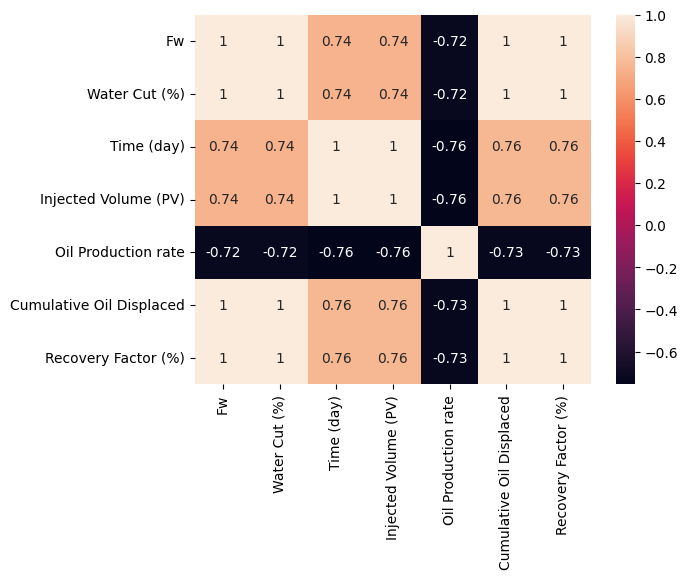

In [31]:
sns.heatmap(ProdProfile.corr(), annot=True)

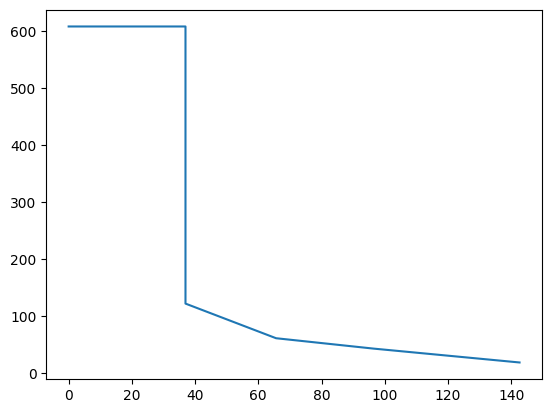

In [32]:
plt.plot(ProdProfile["Time (day)"],ProdProfile["Oil Production rate"])


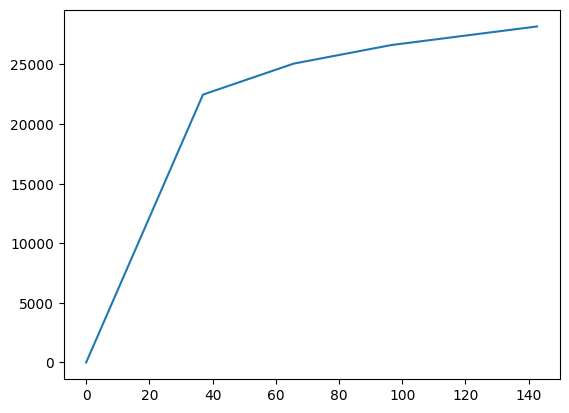

In [33]:
plt.plot(ProdProfile["Time (day)"],ProdProfile["Cumulative Oil Displaced"])